In [1]:
import pandas as pd
import glob
import seaborn as sns

In [2]:
def read_file(file):
    """
    Read a file to a dict of lists.

    :param str file: Path to a sample file.
    :return: dict of lists of records
    :rtype: dict
    """
    vcf_dict = []
    #df = pd.DataFrame()
    with open(file, 'r') as invcf:
        for line in invcf:
            if line.startswith('track'):
                continue
                
    
    
            line = line.strip().split()
            CHR = line[0]
            START = line[1]
            END = line[2]
            SCORE = line[3]
            name = str(file.split('/')[-1]) 
            
            if SCORE == '2':
                continue
                
            if SCORE > 4:
                continue
            
            vcf_dict.append([name, CHR, START,END, SCORE])
            
            
def read_multiple_files(path_of_files):
    """
    Read the path of vcf files to a dataframe.
    :param str file: Path to a files.
    :return: dict of lists of  records
    :rtype: dict
    """
    files = glob.glob(path_of_files+'*')
    chm13list = []
    for file in files:
        #return pd.DataFrame(read_vcf(file))
        chm13list.append(read_file(file))
    
    return (chm13list)

In [3]:
chm13_new = pd.read_csv('/home/jbazanwilliamson/LP6005443-DNA_B08.csv')
chm13_new

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID
0,chr1,0,9083,44,0,+,0,0,"0,255,0",43.565982
1,chr1,9083,10803,35,0,+,0,0,"32,178,170",34.623377
2,chr1,10803,14487,20,0,+,0,0,"0,255,255",19.857934
3,chr1,14487,18731,11,0,+,0,0,"255,0,0",10.807284
4,chr1,18731,20013,12,0,+,0,0,"255,0,0",12.151543
...,...,...,...,...,...,...,...,...,...,...
1179222,chr22,51301662,51302662,37,0,+,0,0,"32,178,170",37.292350
1179223,chr22,51302662,51303662,34,0,+,0,0,"32,178,170",34.407372
1179224,chr22,51303662,51306044,36,0,+,0,0,"32,178,170",36.074609
1179225,chr22,51306044,51312584,46,0,+,0,0,"0,255,0",46.399803


In [4]:
chm13_new_lifted = pd.read_table('/home/jbazanwilliamson/LP6005443-DNA_B08_T2T_lift.bed', names =chm13_new.columns)
chm13_new_lifted


,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID
0,chr1,234054,235779,35,0,+,0,0,"32,178,170",34.623377
1,chr1,523243,527780,11,0,+,0,0,"255,0,0",10.807284
2,chr1,527780,529062,12,0,+,0,0,"255,0,0",12.151543
3,chr1,537215,539285,11,0,+,0,0,"255,0,0",10.669891
4,chr1,539285,541663,11,0,+,0,0,"255,0,0",10.529636
...,...,...,...,...,...,...,...,...,...,...
1151647,chr22,51224909,51226593,33,0,+,0,0,"32,178,170",32.507247
1151648,chr22,51226593,51227593,37,0,+,0,0,"32,178,170",37.292350
1151649,chr22,51227593,51228593,34,0,+,0,0,"32,178,170",34.407372
1151650,chr22,51228593,51230947,36,0,+,0,0,"32,178,170",36.074609


In [5]:
chm13_new = pd.read_csv('/home/jbazanwilliamson/LP6005443-DNA_B08.csv')
chm13_new.to_csv('../data/LP6005443-DNA_B08_T2T.bed', sep='\t', header=False, index=False )

chm13_new_lifted = pd.read_table('/home/jbazanwilliamson/LP6005443-DNA_B08_T2T_lift.bed', names =chm13_new.columns)

chm13_new['#"chrom"'] = chm13_new['#"chrom"'].str.replace('chr', '')
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].astype(int)
chm13_new['lenght'] = chm13_new['chromEnd'] - chm13_new['chromStart']

chm13_new = chm13_new[chm13_new['lenght'] > 1000] #more than 1kb 
chm13_new = chm13_new.loc[(chm13_new['lenght'] < 1000000),:]  #less than 1Mb
#chm13_new['ID'].hist(bins=100, log=True)

#chm13_new = chm13_new.drop(chm13_new[chm13_new.score == 2 ])


#chm13_new.drop(chm13_new[chm13_new['score'] == 2 ])

chm13_new = chm13_new[chm13_new['name'] != 2]
chm13_new = chm13_new[chm13_new['name'] < 5]
chm13_new = chm13_new[chm13_new.iloc[:,0] != 'Y']
chm13_new = chm13_new[chm13_new.iloc[:,0] != 'M']

chm13_new


,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
69,1,212443,223266,4,0,+,0,0,"65,105,225",4.017527,10823
83,1,246711,248501,4,0,+,0,0,"65,105,225",3.652605,1790
84,1,248501,253471,4,0,+,0,0,"65,105,225",3.884893,4970
89,1,260453,261566,3,0,+,0,0,"0,0,205",2.887880,1113
90,1,261566,263205,3,0,+,0,0,"0,0,205",3.398709,1639
...,...,...,...,...,...,...,...,...,...,...,...
1179212,22,51283116,51286137,4,0,+,0,0,"65,105,225",3.781137,3021
1179213,22,51286137,51288688,4,0,+,0,0,"65,105,225",3.891665,2551
1179215,22,51289688,51291273,4,0,+,0,0,"65,105,225",4.201965,1585
1179216,22,51291273,51292827,4,0,+,0,0,"65,105,225",3.945943,1554


In [6]:
chm13_new_lifted['#"chrom"'] = chm13_new_lifted['#"chrom"'].str.replace('chr', '')
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].astype(int)
chm13_new_lifted['lenght'] = chm13_new_lifted['chromEnd'] - chm13_new_lifted['chromStart']

chm13_new_lifted = chm13_new_lifted[chm13_new_lifted['lenght'] > 1000] #more than 1kb 
chm13_new_lifted = chm13_new_lifted.loc[(chm13_new_lifted['lenght'] < 1000000),:]  #less than 1Mb
#chm13_new['ID'].hist(bins=100, log=True)

#chm13_new = chm13_new.drop(chm13_new[chm13_new.score == 2 ])


#chm13_new.drop(chm13_new[chm13_new['score'] == 2 ])

chm13_new_lifted = chm13_new_lifted[chm13_new_lifted['name'] != 2]
chm13_new_lifted = chm13_new_lifted[chm13_new_lifted['name'] < 5]
chm13_new_lifted = chm13_new_lifted[chm13_new_lifted.iloc[:,0] != 'Y']
chm13_new_lifted = chm13_new_lifted[chm13_new_lifted.iloc[:,0] != 'M']
chm13_new_lifted 



,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
77,1,753084,754874,4,0,+,0,0,"65,105,225",3.652605,1790
78,1,754874,759879,4,0,+,0,0,"65,105,225",3.884893,5005
83,1,766862,767975,3,0,+,0,0,"0,0,205",2.887880,1113
84,1,767975,769621,3,0,+,0,0,"0,0,205",3.398709,1646
85,1,769621,770921,3,0,+,0,0,"0,0,205",3.326478,1300
...,...,...,...,...,...,...,...,...,...,...,...
1151638,22,51208047,51211068,4,0,+,0,0,"65,105,225",3.781137,3021
1151639,22,51211068,51213619,4,0,+,0,0,"65,105,225",3.891665,2551
1151641,22,51214619,51216204,4,0,+,0,0,"65,105,225",4.201965,1585
1151642,22,51216204,51217758,4,0,+,0,0,"65,105,225",3.945943,1554


In [7]:
file = '../CHM13_SGDP/LP6005443-DNA_B08'

In [8]:
vcf_dict = []
    #df = pd.DataFrame()
with open(file, 'r') as invcf:
    for line in invcf:
        if line.startswith('track'):
            continue
        
        line = line.strip().split()
        CHR = line[0]
        START = line[1]
        END = line[2]
        SCORE = line[3]
        name = str(file.split('/')[-1]) 
            
        #if SCORE == '2':
        #    continue
            
        vcf_dict.append([name, CHR, START,END, SCORE])

In [9]:
chm13_old = pd.DataFrame(vcf_dict)

chm13_old.columns = ['SAMPLE', 'CHR', 'START', 'END', 'SCORE']
chm13_old['START'] = chm13_old['START'].astype(int)
chm13_old['END'] = chm13_old['END'].astype(int)
chm13_old['SCORE'] = chm13_old['SCORE'].astype(int)
chm13_old['LENGHT'] = chm13_old['END'] - chm13_old['START']


# MORE THAN 1K AND LESS THAN 1M 
chm13_old = chm13_old[chm13_old['LENGHT'] > 1000] #more than 1kb 
chm13_old = chm13_old.loc[(chm13_old['LENGHT'] < 1000000),:] 


chm13_old = chm13_old[chm13_old['SCORE'] != 2]
chm13_old = chm13_old[chm13_old['SCORE'] < 5]
chm13_old

,SAMPLE,CHR,START,END,SCORE,LENGHT
16,LP6005443-DNA_B08,CP068255.2,0,3514,0,3514
18,LP6005443-DNA_B08,CP068255.2,8916,12222,3,3306
23,LP6005443-DNA_B08,CP068255.2,79662,98643,1,18981
26,LP6005443-DNA_B08,CP068255.2,105118,116978,1,11860
31,LP6005443-DNA_B08,CP068255.2,136293,139844,1,3551
...,...,...,...,...,...,...
1179186,LP6005443-DNA_B08,CP086569.2,62306640,62309531,1,2891
1179205,LP6005443-DNA_B08,CP086569.2,62403013,62404358,3,1345
1179210,LP6005443-DNA_B08,CP086569.2,62425307,62426562,4,1255
1179211,LP6005443-DNA_B08,CP086569.2,62426562,62428429,3,1867


In [10]:
feature_table = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')


/opt/spack/opt/spack/linux-rhel8-icelake/gcc-8.4.1/anaconda3-2021.05-fmo625scqdt32etnaksoexe3rd6sea7j/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
genbankid = list(report['GenBank-Accn'])
ch = list(report['Assigned-Molecule'])

chm13_old['CHR'] = chm13_old['CHR'].replace(genbankid, ch)
chm13_old = chm13_old.sort_values(by='CHR')
chm13_old = chm13_old[chm13_old.CHR != 'Y']
chm13_old = chm13_old[chm13_old.CHR != 'MT']
chm13_old 

,SAMPLE,CHR,START,END,SCORE,LENGHT
1079470,LP6005443-DNA_B08,1,916247,919155,4,2908
1111724,LP6005443-DNA_B08,1,84106107,84116988,1,10881
1111490,LP6005443-DNA_B08,1,83554751,83558602,1,3851
1111430,LP6005443-DNA_B08,1,83412440,83413922,3,1482
1111417,LP6005443-DNA_B08,1,83392551,83394211,3,1660
...,...,...,...,...,...,...
30398,LP6005443-DNA_B08,X,101195641,101199283,1,3642
30425,LP6005443-DNA_B08,X,101280843,101282341,1,1498
30424,LP6005443-DNA_B08,X,101278017,101280843,1,2826
30423,LP6005443-DNA_B08,X,101276773,101278017,1,1244


<AxesSubplot:>

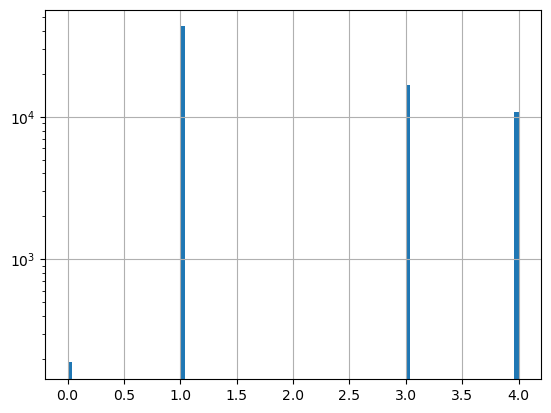

In [12]:
chm13_old['SCORE'].hist(bins=100, log=True)

<AxesSubplot:>

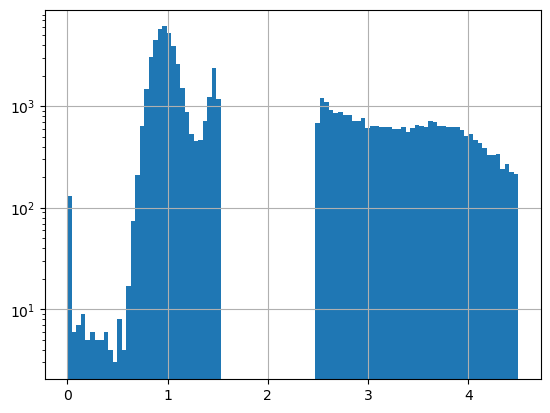

In [13]:
chm13_new['ID'].hist(bins=100, log=True)

<AxesSubplot:>

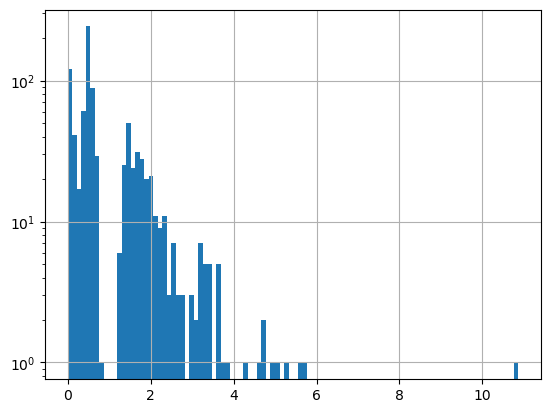

In [14]:
hg19 = pd.read_csv('../data/cnvator_data_sudmant_overlapped.csv')
hg19 = hg19.loc[hg19['Sample_ID'] == 'LP6005443-DNA_B08'] 
hg19['RD'].hist(bins=100, log=True)

<AxesSubplot:xlabel='Chr', ylabel='RD'>

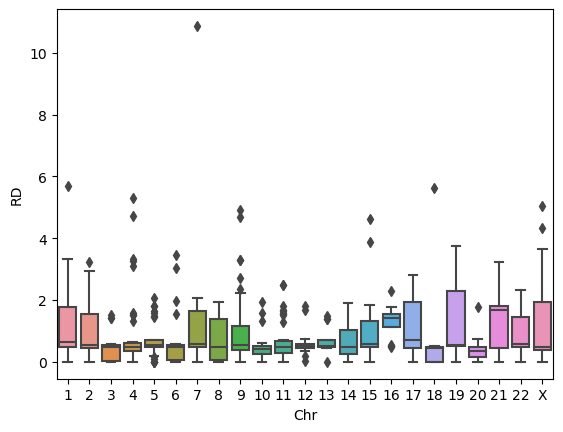

In [15]:
sns.boxplot(data=hg19, x="Chr", y="RD")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

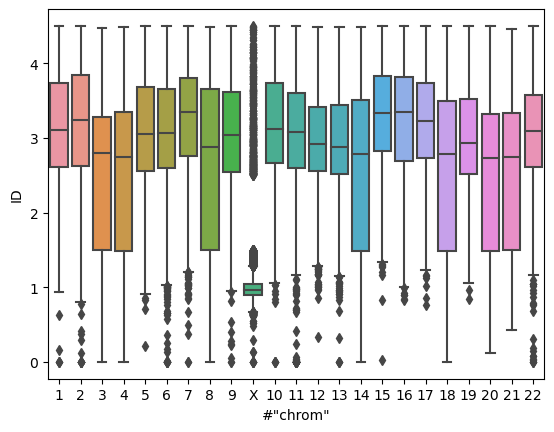

In [16]:
sns.boxplot(data=chm13_new, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

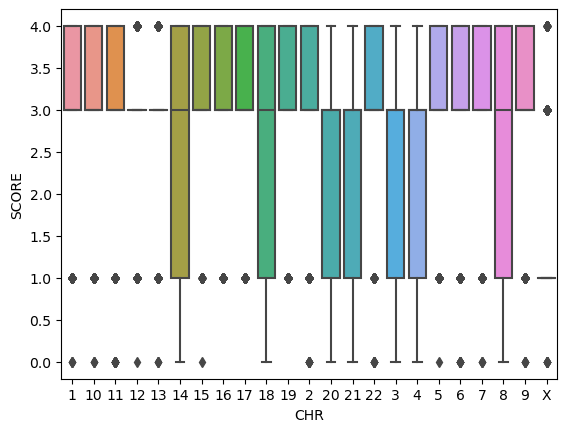

In [17]:
sns.boxplot(data=chm13_old, x='CHR', y="SCORE")

In [18]:
chm13_gene = pd.read_csv('/home/jbazanwilliamson/analysis/chm13_gene_regions.csv', index_col=0)
chm13_gene = chm13_gene.loc[chm13_gene['SAMPLE'] == 'LP6005443-DNA_B08'] 
chm13_gene

chm13_gene['CHR'] = chm13_gene['CHR'].str.replace('chr', '')
chm13_gene = chm13_gene.sort_values(by='CHR')

/opt/spack/opt/spack/linux-rhel8-icelake/gcc-8.4.1/anaconda3-2021.05-fmo625scqdt32etnaksoexe3rd6sea7j/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

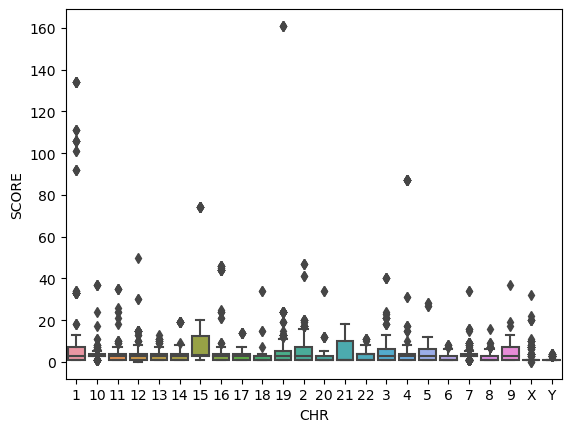

In [19]:
sns.boxplot(data=chm13_gene, x='CHR', y="SCORE")


In [109]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
gene_anotation = pd.DataFrame()
gene_anotation['CHR'] = chm13_gene_anotation['chromosome']
gene_anotation['START'] = chm13_gene_anotation['start']
gene_anotation['END'] = chm13_gene_anotation['end']
gene_anotation['CHR'] = gene_anotation['CHR'].apply(str)
gene_anotation = gene_anotation.drop_duplicates()
#gene_anotation['CHR_2'] = chm13_gene_anotation['chromosome'] 


#### Filtering cnvs just in protein coding regions 

overlapped = []

chm13_np = chm13_new.to_numpy()
gene_anotation_np = gene_anotation.to_numpy()

for cnv in chm13_np:
    for gene in gene_anotation_np:
    
        if cnv[0] == gene[0]: #Chromosome
            # CNVS in gene regions
            if (gene[1] <= cnv[1] <= gene[2]) or (gene[1] <= cnv[2] <= gene[2]):
                #leng_dqna = (cnv_q[3]-cnv_q[2])
                #leng_cnvnator = (cnv_c[2]-cnv_c[1])
                #if (leng_dqna/leng_cnvnator)>0.6:
                overlapped.append([cnv[0], cnv[1], cnv[2], cnv[3], cnv[-2]])
                    #overlapped.append(cnv_q)
            # SUDMANT DATA CNVS in QDNASEQ CNVs(QDNASEQ bigger than SUDMANT DATA)
            
          #  if (cnv[1] <= gene[1] <= cnv[2]) or (cnv[1] <= gene[2] <= cnv[2]):
                #leng_dq/na = (cnv_q[3]-cnv_q[2])
                #leng_cnvnator = (cnv_c[2]-cnv_c[1])
                #if (leng_cnvnator/leng_dqna)>0.6:
              #  overlapped.append([cnv[0], gene[3], cnv[2], cnv[3], gene[1], gene[2], cnv[4], cnv[6]])
                    #overlapped.append([cnv_q, cnv_c])
                    #overlapped.append(cnv_q)



In [114]:
chm13 = pd.DataFrame(overlapped)
chm13

,0,1,2,3,4
0,1,212443,223266,4,4.017527
1,1,212443,223266,4,4.017527
2,1,246711,248501,4,3.652605
3,1,248501,253471,4,3.884893
4,1,260453,261566,3,2.887880
...,...,...,...,...,...
126381,22,51291273,51292827,4,3.945943
126382,22,51291273,51292827,4,3.945943
126383,22,51292827,51295018,4,3.676020
126384,22,51292827,51295018,4,3.676020


In [115]:
chm13_gene = chm13.drop_duplicates()
chm13_gene.columns = ['chr', 'start', 'end', 'score', 'id']
chm13_gene

,chr,start,end,score,id
0,1,212443,223266,4,4.017527
2,1,246711,248501,4,3.652605
3,1,248501,253471,4,3.884893
4,1,260453,261566,3,2.887880
7,1,261566,263205,3,3.398709
...,...,...,...,...,...
126371,22,51283116,51286137,4,3.781137
126374,22,51286137,51288688,4,3.891665
126377,22,51289688,51291273,4,4.201965
126380,22,51291273,51292827,4,3.945943


<AxesSubplot:xlabel='chr', ylabel='id'>

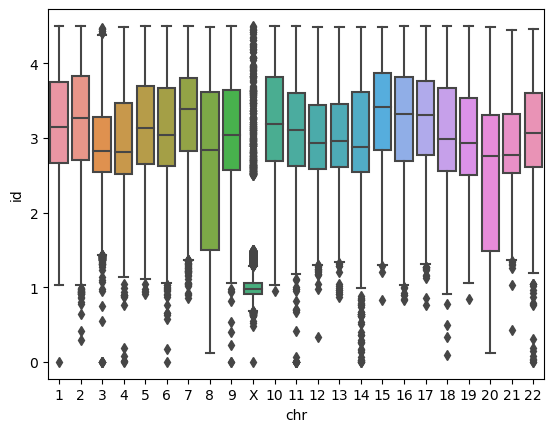

In [119]:
sns.boxplot(data=chm13_gene, x="chr", y="id")

In [120]:
chm13_new = chm13_new[chm13_new['name'] < 10]
chm13_new

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
69,1,212443,223266,4,0,+,0,0,"65,105,225",4.017527,10823
83,1,246711,248501,4,0,+,0,0,"65,105,225",3.652605,1790
84,1,248501,253471,4,0,+,0,0,"65,105,225",3.884893,4970
89,1,260453,261566,3,0,+,0,0,"0,0,205",2.887880,1113
90,1,261566,263205,3,0,+,0,0,"0,0,205",3.398709,1639
...,...,...,...,...,...,...,...,...,...,...,...
1179212,22,51283116,51286137,4,0,+,0,0,"65,105,225",3.781137,3021
1179213,22,51286137,51288688,4,0,+,0,0,"65,105,225",3.891665,2551
1179215,22,51289688,51291273,4,0,+,0,0,"65,105,225",4.201965,1585
1179216,22,51291273,51292827,4,0,+,0,0,"65,105,225",3.945943,1554
